<a id='intro'></a>
## Introduction

> *This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [20]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()
df.shape
df.info()
df.describe()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


0

In [24]:
# After discussing the structure of the data and any problems that need to be

df.drop (['PatientId','AppointmentID','ScheduledDay','AppointmentID'] ,axis = 1, inplace=True )
df.head


<bound method NDFrame.head of        Gender        AppointmentDay  Age      Neighbourhood  Scholarship  \
0           F  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1           M  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2           F  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3           F  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4           F  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
5           F  2016-04-29T00:00:00Z   76          REPÚBLICA            0   
6           F  2016-04-29T00:00:00Z   23         GOIABEIRAS            0   
7           F  2016-04-29T00:00:00Z   39         GOIABEIRAS            0   
8           F  2016-04-29T00:00:00Z   21         ANDORINHAS            0   
9           F  2016-04-29T00:00:00Z   19          CONQUISTA            0   
10          F  2016-04-29T00:00:00Z   30     NOVA PALESTINA            0   
11          M  2016-04-29T00:00:00Z   29     NOVA PALESTIN

In [23]:
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'No-show':'No_show'},inplace=True)
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head

<bound method NDFrame.head of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946e+

<a id='eda'></a>
## Exploratory Data Analysis


### Looking to data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b80638e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7fb9c9b0>]], dtype=object)

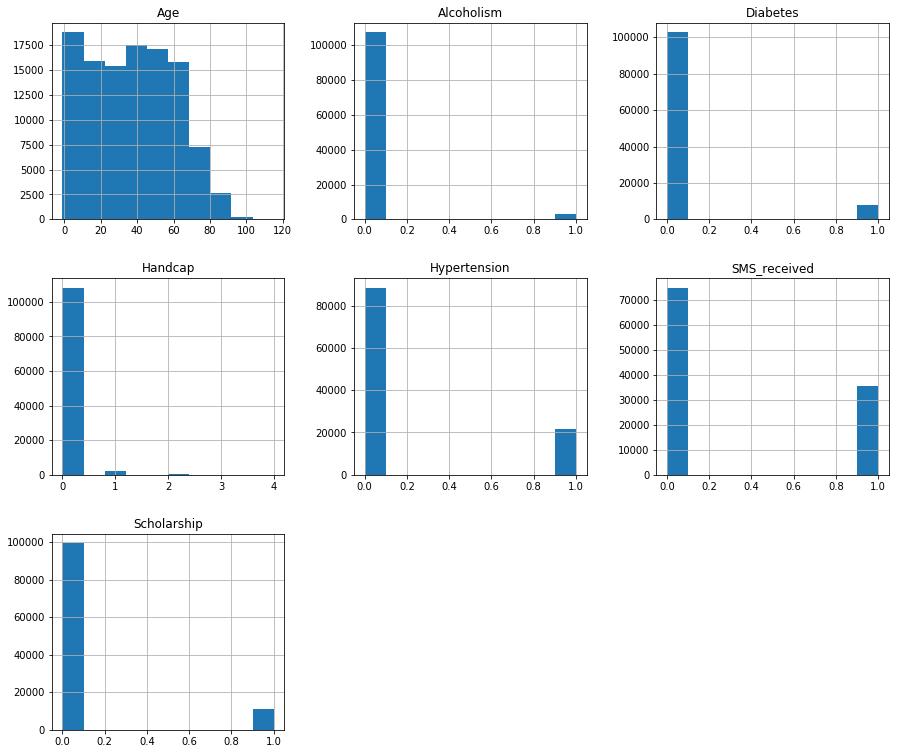

In [43]:
# Use this, and more code cells, to explore your data. Don't forget to add
df.hist(figsize=(15,13))

In [47]:

#   Markdown cells to document your observations and findings.
show= df.No_show =='No'
noshow= df.No_show =='yas'
df[show].count(),df[noshow].count()

(Gender            88208
 AppointmentDay    88208
 Age               88208
 Neighbourhood     88208
 Scholarship       88208
 Hypertension      88208
 Diabetes          88208
 Alcoholism        88208
 Handcap           88208
 SMS_received      88208
 No_show           88208
 dtype: int64, Gender            0
 AppointmentDay    0
 Age               0
 Neighbourhood     0
 Scholarship       0
 Hypertension      0
 Diabetes          0
 Alcoholism        0
 Handcap           0
 SMS_received      0
 No_show           0
 dtype: int64)

### Analizing on data

F    57246
M    30962
Name: Gender, dtype: int64
Series([], Name: Gender, dtype: int64)
0    79925
1     8283
Name: Scholarship, dtype: int64
Series([], Name: Scholarship, dtype: int64)
0    70179
1    18029
Name: Hypertension, dtype: int64
Series([], Name: Hypertension, dtype: int64)


Text(0,0.5,'patlents numbers')

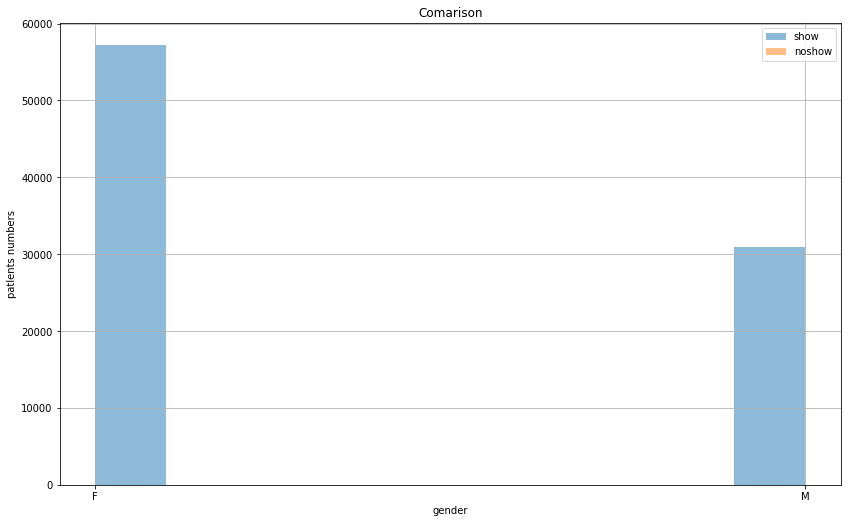

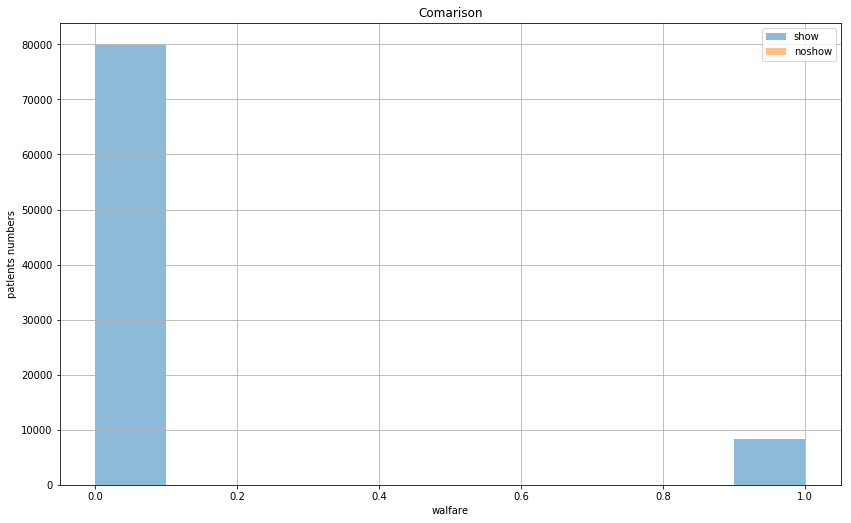

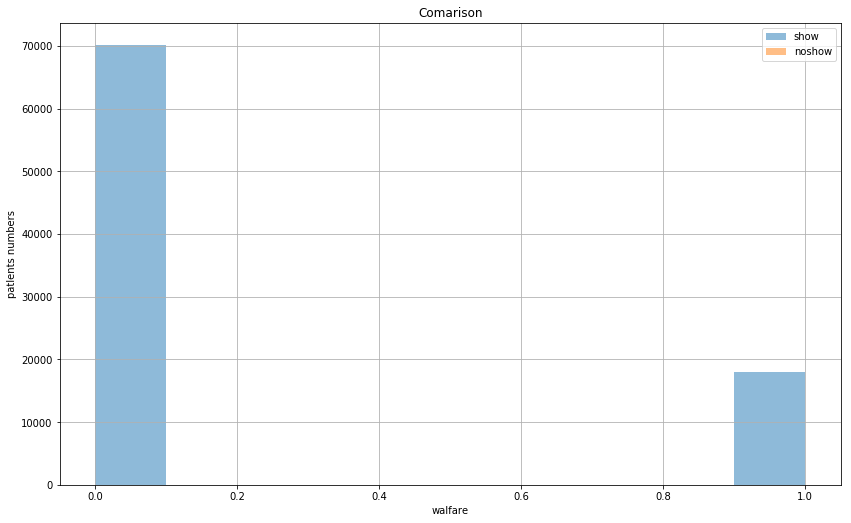

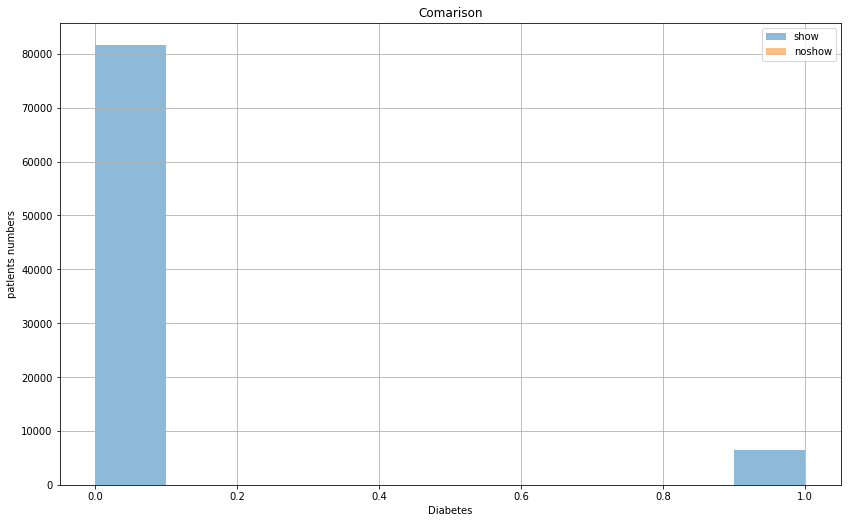

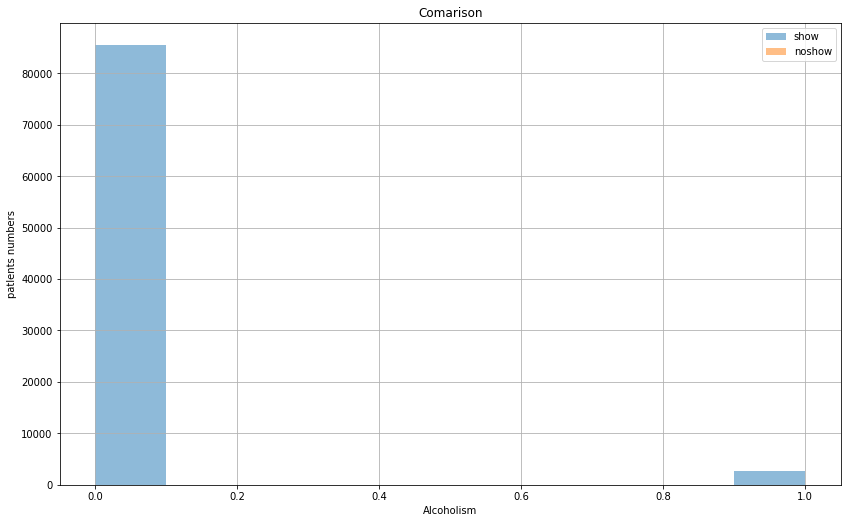

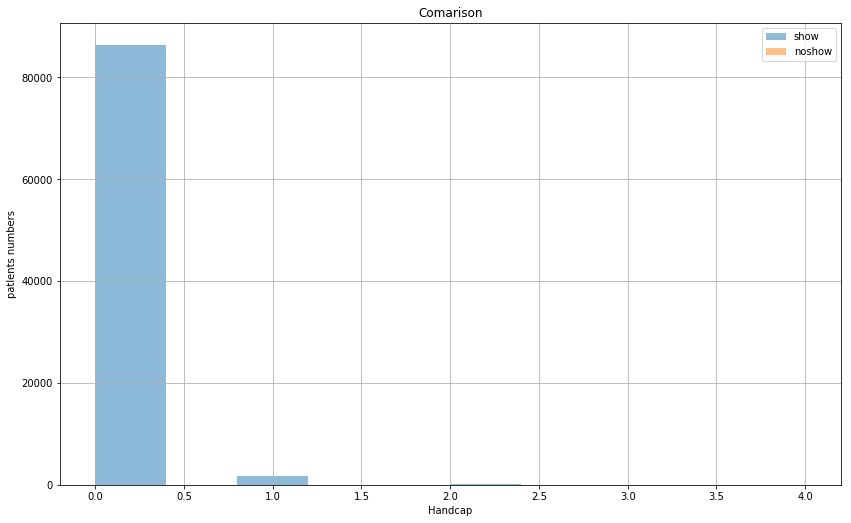

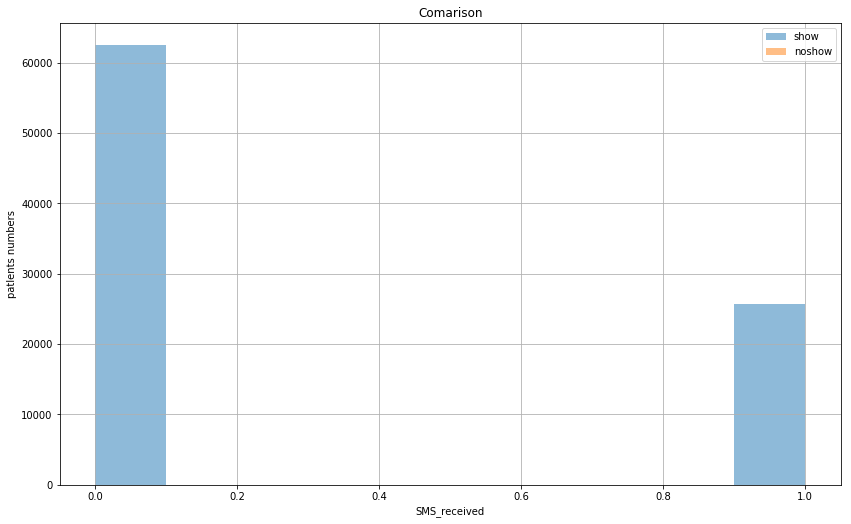

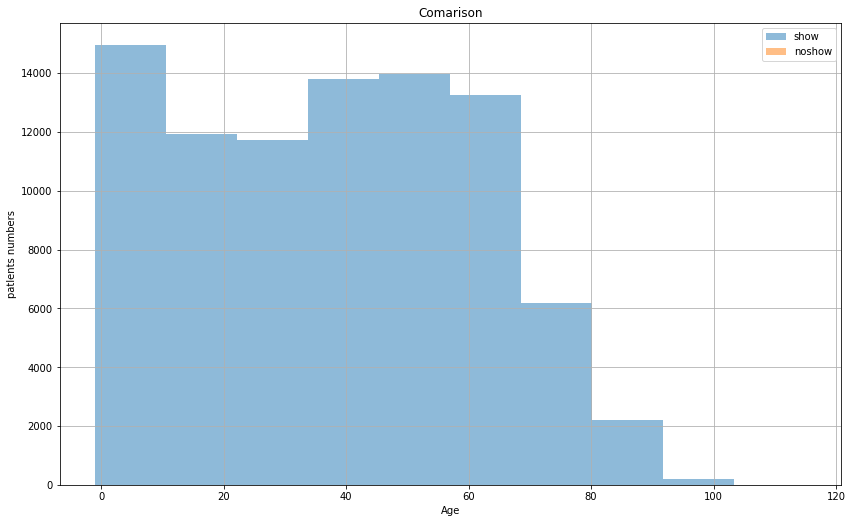

In [51]:
# Continue to explore the data to address your additional research
plt.figure(figsize=[14,8.5])
df.Gender[show].hist(alpha = .5, label = 'show')
df.Gender[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('gender')
plt.ylabel('patlents numbers')
print (df.Gender[show].value_counts())
print (df.Gender[noshow].value_counts())
df.groupby("Gender").No_show.value_counts()

plt.figure(figsize=[14,8.5])
df.Scholarship[show].hist(alpha = .5, label = 'show')
df.Scholarship[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('walfare')
plt.ylabel('patlents numbers')
print (df.Scholarship[show].value_counts())
print (df.Scholarship[noshow].value_counts())
df.groupby("Scholarship").No_show.value_counts()

plt.figure(figsize=[14,8.5])
df.Hypertension[show].hist(alpha = .5, label = 'show')
df.Hypertension[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('walfare')
plt.ylabel('patlents numbers')
print (df.Hypertension[show].value_counts())
print (df.Hypertension[noshow].value_counts())


plt.figure(figsize=[14,8.5])
df.Diabetes[show].hist(alpha = .5, label = 'show')
df.Diabetes[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('Diabetes')
plt.ylabel('patlents numbers')

plt.figure(figsize=[14,8.5])
df.Alcoholism[show].hist(alpha = .5, label = 'show')
df.Alcoholism[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('Alcoholism')
plt.ylabel('patlents numbers')

plt.figure(figsize=[14,8.5])
df.Handcap[show].hist(alpha = .5, label = 'show')
df.Handcap[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('Handcap')
plt.ylabel('patlents numbers')

plt.figure(figsize=[14,8.5])
df.SMS_received[show].hist(alpha = .5, label = 'show')
df.SMS_received[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('SMS_received')
plt.ylabel('patlents numbers')

plt.figure(figsize=[14,8.5])
df.Age[show].hist(alpha= .5, label = 'show')
df.Age[noshow].hist(alpha = .5, label = 'noshow')
plt.legend()
plt.title('Comarison')
plt.xlabel('Age')
plt.ylabel('patlents numbers')



In [59]:
plt.figure(figsize[18,4])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', Alpha=0.5, color= 'blue' ,label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', Alpha=0.5, color= 'blue' ,label='noshow')
plt.title('Comarison')
plt.xlabel('Neighbourhood')
plt.ylabel('patlents numbers')

NameError: name 'figsize' is not defined

Text(0,0.5,'patlents numbers')

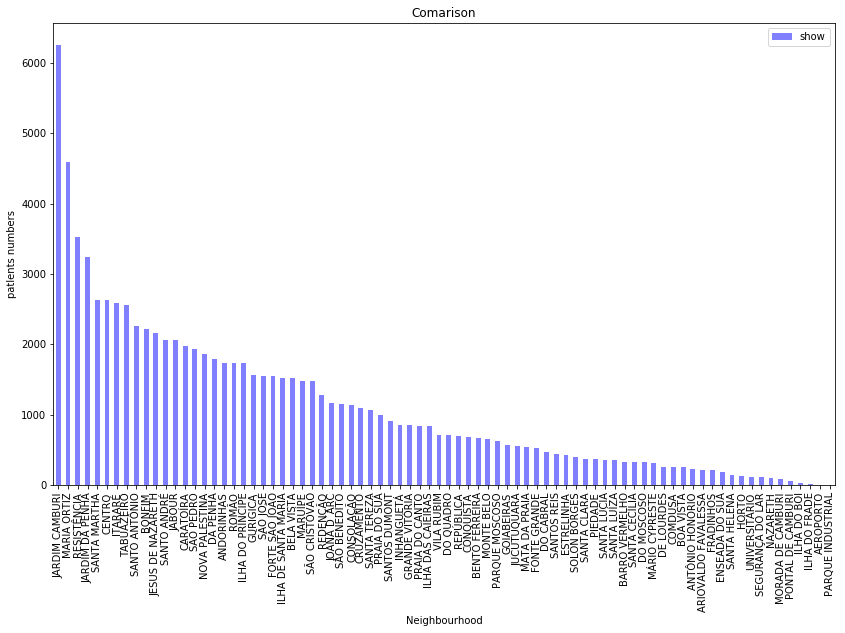

In [48]:
plt.figure(figsize=[14,8.5])
df.Neighbourhood[show].value_counts().plot (kind='bar', Alpha=0.5, color= 'blue' ,label='show')
plt.legend()
plt.title('Comarison')
plt.xlabel('Neighbourhood')
plt.ylabel('patlents numbers')

<a id='conclusions'></a>
## Conclusions

> 

in the end, Neighbourhood has related of the pattern be in clinic
most age between 0-10 then age between 35-70
many of pepole don't receved there SMS

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0